In [1]:
import numpy as np
!pip install opencv-python
import cv2 #OPEN CV
from matplotlib import pyplot as plt #to show the images

In [2]:
def process_img(image): #basically tuning the parameters before getting the contours  
    image_d = cv2.fastNlMeansDenoisingColored(image,None,15,15,11,30) #denoising
    Gray = cv2.cvtColor(image_d, cv2.COLOR_BGR2GRAY) # turn gray  
    Blur = cv2.GaussianBlur(Gray,(7,7),1)
    Canny = cv2.Canny(Blur,100,100) 
    kernel = np.ones((3,3) , np.uint8)
    imgDial = cv2.dilate(Canny, kernel,iterations=5)
    return imgDial

In [3]:
def paintFloor(img):

    img_processed = process_img(img)
    contours, hierarchy = cv2.findContours(img_processed,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    height, width = img.shape[:2] # get matrix sizes
    
    # Create a mask for the convex hull
    mask = np.zeros_like(img)  
    result = img.copy() #we will work on result as to not alter original img
    
    all_coordinates = []
    #detect contour
    for i in contours: #look through contours
        area = cv2.contourArea(i) # get Area
        if area>800: #area threshold
            cv2.drawContours(result,[i],-1,(0,255,0),2) #draw green contour lines
            for point in i:
                x, y = point[0]
                # Append the (x, y) coordinate to the list
                all_coordinates.append((x, y))
                
    all_coordinates = sorted(all_coordinates, key=lambda x: x[0])    
    
    max_y_values = {}
    for x, y in all_coordinates:
        if x not in max_y_values or y > max_y_values[x]:
            max_y_values[x] = y

    filtered_coordinates = [(x, max_y_values[x]) for x in max_y_values]
    
    for c in filtered_coordinates:
        x, y = c
        mask[y:width,x] = (0,0,255)
        
    result = cv2.addWeighted(result, 1, mask, 0.3, 0)
      
    return result

In [4]:
f1 = cv2.imread(r"Refinishing.jpg")

In [5]:
c= paintFloor(f1)

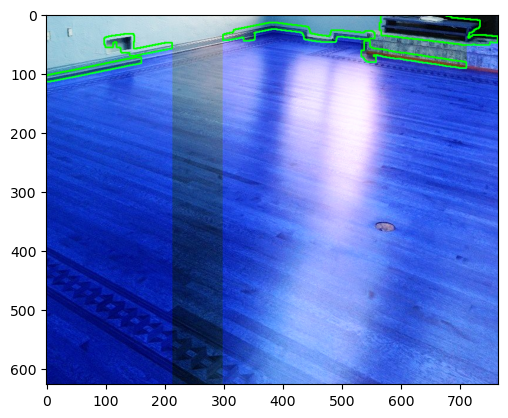

In [6]:
plt.imshow(c)